In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
# 如果執行錯誤，代表可能沒有將people"在雲端硬碟中新增捷徑"
! ls -A1 /content/drive/My\ Drive/people/

01.jpg
cfg
crowdhuman
darknet
.ipynb_checkpoints
label_person.ipynb
people
weights
weights_tiny
weights_tiny_1
weights_tiny_2
weights_tiny_3
yolos
yolos_person
yolov4.conv.137
YOLOv4_person.ipynb
'YOLOv4_person.ipynb (yu_chih)'
yolov4-tiny.conv.29
YOLOv4_tiny_person.ipynb


## 檢查GPU型號

In [3]:
# check NVIDIA GPU
! nvidia-smi

Mon Aug 31 03:02:33 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 設定路徑

In [4]:
# /Darknet
LOCAL_DARKNET_PATH = "/content/darknet"
# /people
GDRIVE_PEOPLE_PATH = "/content/drive/My\ Drive/people"
GDRIVE_PEOPLE_PATH_py = "/content/drive/My Drive/people"
# config
GDRIVE_YOLO_CFG_PATH = "/content/drive/My\ Drive/people/cfg"
GDRIVE_YOLO_CFG_PATH_py = "/content/drive/My Drive/people/cfg"
# Data
GDRIVE_YOLO_DATA_PATH = "/content/drive/My\ Drive/people/yolos_person"
GDRIVE_YOLO_DATA_PATH_py = "/content/drive/My Drive/people/yolos_person"
# Output weights
GDRIVE_WEIGHTS_PATH = "/content/drive/My\ Drive/people/weights"
GDRIVE_WEIGHTS_PATH_py = "/content/drive/My Drive/people/weights"
# Output log
GDRIVE_LOG_PATH = "/content/drive/My\ Drive/people/log"
GDRIVE_LOG_PATH_py = "/content/drive/My Drive/people/log"

## 下載 Darknet (AlexeyAB 版本)

In [5]:
! git clone https://github.com/AlexeyAB/darknet.git
!head darknet/Makefile

Cloning into 'darknet'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 14285 (delta 5), reused 7 (delta 4), pack-reused 14272
Receiving objects: 100% (14285/14285), 12.87 MiB | 16.19 MiB/s, done.
Resolving deltas: 100% (9746/9746), done.
GPU=0
CUDNN=0
CUDNN_HALF=0
OPENCV=0
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



In [6]:
# 調整參數
! sed -i "s/GPU=0/GPU=1/g" /content/darknet/Makefile
! sed -i "s/CUDNN=0/CUDNN=1/g" /content/darknet/Makefile
! sed -i "s/OPENCV=0/OPENCV=1/g" /content/darknet/Makefile

! head darknet/Makefile

GPU=1
CUDNN=1
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



# 指定訓練/測試資料
* 在 /cfg 建立 `train.txt` , `test.txt`

In [ ]:
# 若檔案存在則先刪除
! rm {GDRIVE_YOLO_CFG_PATH}/train.txt
! rm {GDRIVE_YOLO_CFG_PATH}/test.txt
! ls -al {GDRIVE_YOLO_CFG_PATH}

import os
datasets = [GDRIVE_YOLO_DATA_PATH_py + '/' + f for f in os.listdir(GDRIVE_YOLO_DATA_PATH_py) if f.endswith('.jpg')]
split_boundary = int(len(datasets) * 0.9)

print("訓練資料數：", split_boundary)

In [ ]:
with open(GDRIVE_YOLO_CFG_PATH_py + '/' + 'train.txt', 'w') as f:
    f.write('\n'.join(datasets[0:split_boundary]))

with open(GDRIVE_YOLO_CFG_PATH_py + '/' + 'test.txt', 'w') as f:
    f.write('\n'.join(datasets[split_boundary:]))

# 查看 train.txt
! head /content/drive/My\ Drive/people/cfg/train.txt
# 查看 test.txt
! head /content/drive/My\ Drive/people/cfg/test.txt

#### 編譯 YOLOv4

In [8]:
! cd darknet; make

chmod +x *.sh


### 確認檔案與路徑

In [9]:
! cat /content/drive/My\ Drive/people/cfg/obj-person.data

class= 1
train=/cfg/train.txt
valid=/cfg/test.txt
names=/cfg/obj-person.names
backup=/weights/


In [10]:
# 將google drive裡的people/建立一個捷徑!指到這台主機的最上層，同名路徑people

! ln -s /content/drive/My\ Drive/people .

In [11]:
! ls /content/people/cfg

 obj-cat17.data		       train_tiny.txt
 obj-cat17.names	       train.txt
 obj.data		       yolov4-cat17.cfg
 obj.names		       yolov4-custom.cfg
 obj-person.data	      'yolov4-person (1).cfg.gdoc'
 obj-person.names	      'yolov4-person (2).cfg.gdoc'
 obj-person_tiny_1.data        yolov4-person.cfg
 obj-person_tiny_1.data.gdoc   yolov4-person.cfg.gdoc
 obj-person_tiny_2.data        yolov4-person_tiny_1.cfg
 obj-person_tiny_3.data        yolov4-person_tiny_2.cfg
 obj-person_tiny.data	       yolov4-person_tiny_2.cfg.gdoc
 obj-person_tiny.names	       yolov4-person_tiny_3.cfg
'test_tiny (1).txt'	       yolov4-person_tiny.cfg
 test_tiny.txt		      'yolov4-tiny-custom (1).cfg.gdoc'
 test.txt		      'yolov4-tiny-custom (2).cfg.gdoc'
'train_tiny (1).txt'	       yolov4-tiny-custom.cfg.gdoc


In [12]:
# final check

# !ls -A1 /content/people/cfg
!cat /content/people/cfg/obj-person.data
# !cat /content/people/cfg/obj-person.names

class= 1
train=/cfg/train.txt
valid=/cfg/test.txt
names=/cfg/obj-person.names
backup=/weights/


In [33]:
# 列出現有的weights
! ls -al /content/people/weights

total 1250080
-rw------- 1 root root 256015980 Aug 20 02:39 'yolov4-person_1000.weights 的副本'
-rw------- 1 root root 256015980 Aug 20 02:39 'yolov4-person_2000.weights 的副本'
-rw------- 1 root root 256015980 Aug 20 02:39 'yolov4-person_best.weights 的副本'
-rw------- 1 root root 256015980 Aug 20 12:53  yolov4-person_last.weights
-rw------- 1 root root 256015980 Aug 20 12:53  yolov4-person_last.weights__


### 以下擇一執行訓練

In [ ]:
# (1) 使用pre-trained weights - 訓練單一類別 person
# ! darknet/darknet detector train {GDRIVE_YOLO_CFG_PATH}/obj-person.data {GDRIVE_YOLO_CFG_PATH}/yolov4-person.cfg yolov4.conv.137 -dont_show | grep "avg loss"

# (2) 使用最後一次訓練產生的weights - 訓練單一類別 person
! darknet/darknet detector train {GDRIVE_YOLO_CFG_PATH}/obj-person.data {GDRIVE_YOLO_CFG_PATH}/yolov4-person.cfg {GDRIVE_WEIGHTS_PATH}/yolov4-person_last.weights -dont_show | grep "avg loss"

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 route  8 2 	                           ->  208 x 208 x 128 
  10 conv   

# 測試訓練結果

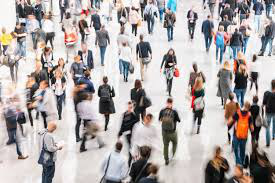

In [34]:
# 找一張圖
from PIL import Image
# Image.open('/content/people/01.jpg')
Image.open('/content/test2.jpg')

In [35]:
# 進行辨識(最後一個參數要改成圖片所在路徑+檔名)
! cd darknet; ./darknet detector test /content/people/cfg/obj-person.data  /content/people/cfg/yolov4-person.cfg /content/people/weights/yolov4-person_best.weights /content/drive/My Drive/content/people/01.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 rou

In [36]:
! cp /content/darknet/predictions.jpg ~/pre.jpg
! ls *jpg

cat.jpg  test2.jpg


In [38]:
# 看圖變標註結果
from PIL import Image
Image.open('/content/darknet/predictions.jpg')
# Image.open('/content/cat.jpg')